In [1]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import joblib
import seaborn as sns
from matplotlib import colors as mcolors
from matplotlib import pyplot as plt
from utils import data_manage_utils

In [2]:
data = pd.read_pickle("./processed_files/01a_preprocessing.pkl")
data

,OP_UNIQUE_CARRIER,ORIGIN,CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,DEP_DELAY(MINS),...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5612585,F9,LAS,230,2811.51698,0,-0.781831,0.62349,0.932008,0.362438,0,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-10
5614966,DL,SFO,268,3442.37826,2,-0.781831,0.62349,0.979045,0.203642,-3,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-8
5616651,DL,SAN,241,3044.87128,2,-0.781831,0.62349,0.999990,-0.004363,-6,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-20
5616326,DL,SFO,270,3442.37826,2,-0.781831,0.62349,0.999762,-0.021815,-5,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-7
5613460,UA,SFO,278,3442.37826,2,-0.781831,0.62349,0.996195,-0.087156,6,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,NK,BWI,122,928.58918,8,-0.781831,0.62349,-0.100188,0.994969,-5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-10
11284363,WN,MDW,110,951.11994,8,-0.781831,0.62349,-0.065403,0.997859,20,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5
11283412,WN,DEN,170,1929.59866,8,-0.781831,0.62349,-0.065403,0.997859,43,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,17
11286614,B6,BOS,179,1522.43564,11,-0.781831,0.62349,-0.047978,0.998848,43,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,30


[-105, -103, -101, -99, -97, -95, -93, -91, -89, -87, -85, -83, -81, -79, -77, -75, -73, -71, -69, -67, -65, -63, -61, -59, -57, -55, -53, -51, -49, -47, -45, -43, -41, -39, -37, -35, -33, -31, -29, -27, -25, -23, -21, -19, -17, -15, -13, -11, -9, -7, -5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149]


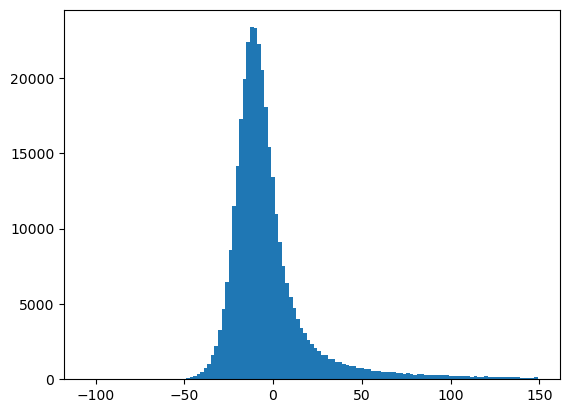

In [3]:
y = data[data.columns[-1:]].to_numpy()
X = data[data.columns[:-1]].to_numpy()
bins_pos = []

for bin_step in range(-105, 150, 1):
    bins_pos.append(bin_step)

print(bins_pos)
fig, ax = plt.subplots()
ax.hist(y, bins=bins_pos)
ax.set_title("Histogram of Arrival Delay")
plt.show()

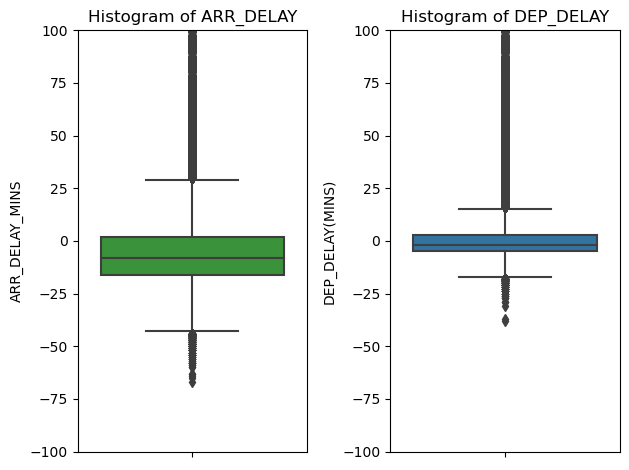

In [26]:
fig, ax = plt.subplots(1,2)

ax[0].set_title("Histogram of ARR_DELAY")
ax[0].set_ylim(top=100, bottom=-100)
ax[1].set_title("Histogram of DEP_DELAY")
ax[1].set_ylim(top=100, bottom=-100)
sns.boxplot(data=data, y="ARR_DELAY_MINS", ax = ax[0], color="tab:green")
sns.boxplot(data=data, y="DEP_DELAY(MINS)", ax = ax[1], color="tab:blue")
fig.tight_layout()

In [12]:
np.sum(data["DEP_DELAY(MINS)"].isna()

0

[]

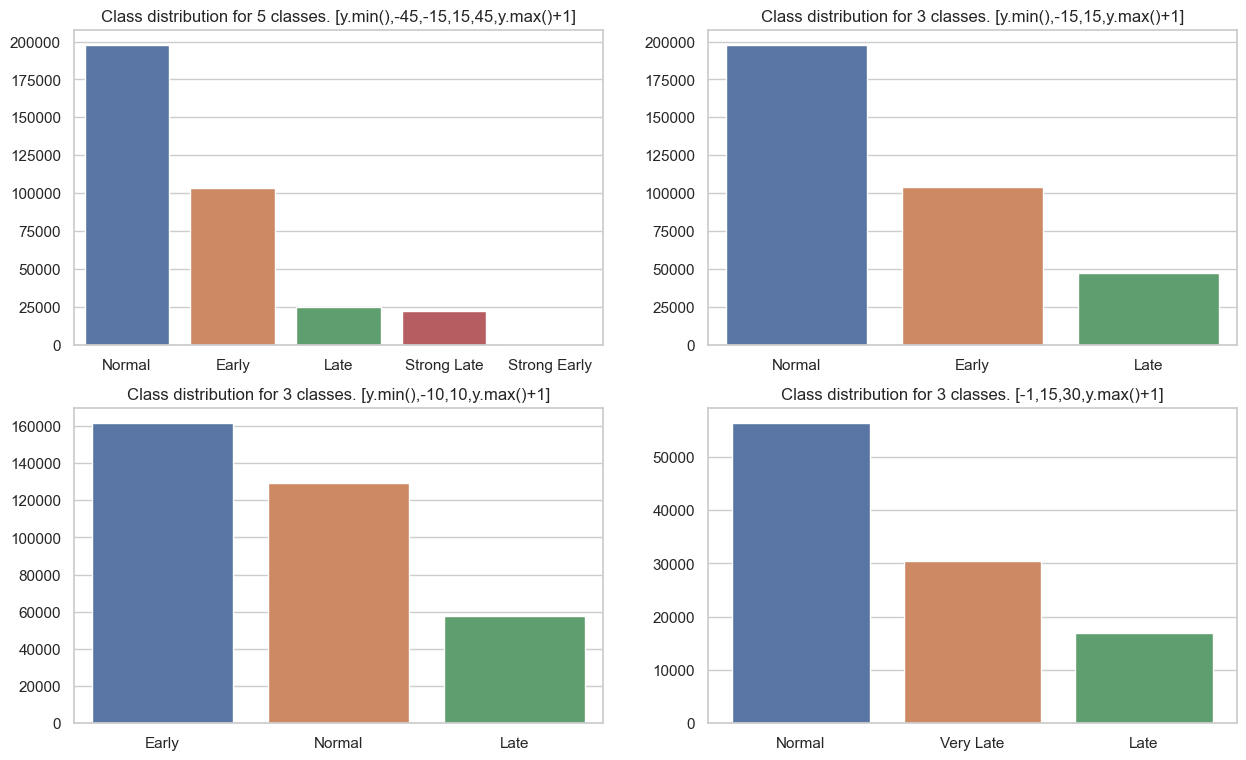

In [96]:
fig, axes = plt.subplots(2,2,figsize=(15,9))

bins1 = [y.min(),-45,-15,15,45,y.max()+1]
labels1 = ["Strong Early","Early","Normal","Late","Strong Late"]
bins2 = [y.min(),-15,15,y.max()+1]
labels2 = ["Early","Normal","Late"]
bins3 = [y.min(),-10,10,y.max()+1]
labels3 = ["Early","Normal","Late"]
bins4 = [-1,15,30,y.max()+1]
labels4 = ["Normal","Late","Very Late"]

axes[0][0].set_title("Class distribution for 5 classes. [y.min(),-45,-15,15,45,y.max()+1]")
axes[0][1].set_title("Class distribution for 3 classes. [y.min(),-15,15,y.max()+1]")
axes[1][0].set_title("Class distribution for 3 classes. [y.min(),-10,10,y.max()+1]")
axes[1][1].set_title("Class distribution for 3 classes. [-1,15,30,y.max()+1]")

data4 = data.where(data["ARR_DELAY_MINS"] >= 0).dropna()

cats1 = pd.cut(data.ARR_DELAY_MINS, bins1, labels = labels1,include_lowest = True)
cats2 = pd.cut(data.ARR_DELAY_MINS, bins2, labels = labels2,include_lowest = True)
cats3 = pd.cut(data.ARR_DELAY_MINS, bins3, labels = labels3,include_lowest = True)
cats4 = pd.cut(data4.ARR_DELAY_MINS, bins4, labels = labels4,include_lowest = True)

sns.barplot(x=list(cats1.value_counts().index), y= list(cats1.value_counts()), ax=axes[0][0])
sns.barplot(x=list(cats2.value_counts().index), y= list(cats2.value_counts()), ax=axes[0][1])
sns.barplot(x=list(cats3.value_counts().index), y= list(cats3.value_counts()), ax=axes[1][0])
sns.barplot(x=list(cats4.value_counts().index), y= list(cats4.value_counts()), ax=axes[1][1])

plt.plot()

In [97]:
SET_TO_USE = 1

if SET_TO_USE == 1:
    y_dict = {
        "Early" : 0,
        "Normal" : 1,
        "Late" : 2
    }
    data["ARR_DELAY_CATS"] = list(cats2.values)
    data = data.drop(["ARR_DELAY_MINS"], axis="columns")
    data["ARR_DELAY_CATS"] = data["ARR_DELAY_CATS"].apply(lambda x: int(y_dict.get(x)))
elif SET_TO_USE == 2:
    y_dict = {
        "Early" : 0,
        "Normal" : 1,
        "Late" : 2
    }
    data["ARR_DELAY_CATS"] = list(cats3.values)
    data = data.drop(["ARR_DELAY_MINS"], axis="columns")
    data["ARR_DELAY_CATS"] = data["ARR_DELAY_CATS"].apply(lambda x: int(y_dict.get(x)))
elif SET_TO_USE == 3:
    y_dict = {
        "Normal" : 0,
        "Late" : 1,
        "Very Late" : 1
    }
    data4["ARR_DELAY_CATS"] = list(cats4.values)
    data = data4.drop(["ARR_DELAY_MINS"], axis="columns")
    data["ARR_DELAY_CATS"] = data["ARR_DELAY_CATS"].apply(lambda x: int(y_dict.get(x)))


data

,ARR_MIN_OF_DAY_COS,JET(YN),WINGLETS(YN),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),...,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_DELAY_CATS
5612585,0.446798,1,1,410.0,2811.51698,0,2,251.872,34.101024,37.572696,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.894635,1
5614966,0.305184,1,0,448.0,3442.37826,2,2,261.132,34.314384,42.114216,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.952293,1
5616651,0.116537,1,0,421.0,3044.87128,2,2,261.132,34.314384,42.114216,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.993186,0
5616326,0.100522,1,0,450.0,3442.37826,2,2,264.836,38.048184,54.431184,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.994935,1
5613460,0.040266,1,0,458.0,3442.37826,2,2,261.132,34.314384,42.114216,...,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.999189,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,0.838671,1,1,122.0,928.58918,8,2,251.872,34.101024,37.572696,...,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.544639,1
11283412,0.855781,1,0,290.0,1929.59866,8,2,261.132,34.314384,42.114216,...,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.517338,2
11284363,0.855781,1,0,170.0,951.11994,8,2,261.132,34.314384,42.114216,...,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.517338,1
11286614,0.864005,1,1,179.0,1522.43564,11,2,251.872,34.101024,37.572696,...,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.503484,2


In [98]:
X = data[data.columns[:-1]]
y = data[data.columns[-1:]]
#Test-Train-Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_test: " + str(y_test.shape))
X_train

Shape of X_train: (279097, 39)
Shape of y_train: (279097, 1)
Shape of X_test: (69775, 39)
Shape of y_test: (69775, 1)


,ARR_MIN_OF_DAY_COS,JET(YN),WINGLETS(YN),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
7876359,-0.176292,1,0,74.0,510.16078,8,3,255.576,47.335440,55.565040,...,0,0,0.0,0.0,3.0,3.0,2.0,0.000000,1.000000,0.984338
8281253,0.417745,1,1,102.0,650.17336,72,2,259.280,34.101024,44.509944,...,2,2,3.0,1.0,1.0,1.0,3.0,0.433884,-0.900969,-0.908564
11259811,0.227567,1,0,117.0,695.23488,68,2,257.428,28.446984,37.795200,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969,-0.973763
6592688,-0.554733,1,0,139.0,402.33500,57,2,257.428,28.446984,37.795200,...,0,0,1.0,3.0,1.0,3.0,3.0,0.974928,-0.222521,-0.832029
8970026,0.503484,1,0,186.0,975.26004,72,2,257.428,28.446984,37.795200,...,0,0,3.0,0.0,0.0,3.0,2.0,0.433884,-0.900969,-0.864005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577632,-0.305184,1,1,107.0,891.57436,47,2,233.352,34.101024,33.838896,...,0,0,0.0,0.0,0.0,3.0,3.0,0.974928,-0.222521,0.952293
6856848,-0.908564,1,0,298.0,2042.25246,48,3,255.576,47.335440,55.565040,...,0,0,3.0,3.0,0.0,0.0,2.0,-0.974928,-0.222521,0.417745
10388189,-0.861970,1,0,108.0,891.57436,54,3,255.576,47.335440,55.565040,...,0,0,0.0,3.0,0.0,0.0,3.0,0.974928,-0.222521,0.506960
9936124,-0.537866,1,0,171.0,975.26004,62,3,255.576,47.335440,55.565040,...,0,0,3.0,3.0,3.0,0.0,0.0,0.781831,0.623490,0.843031


In [99]:
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)

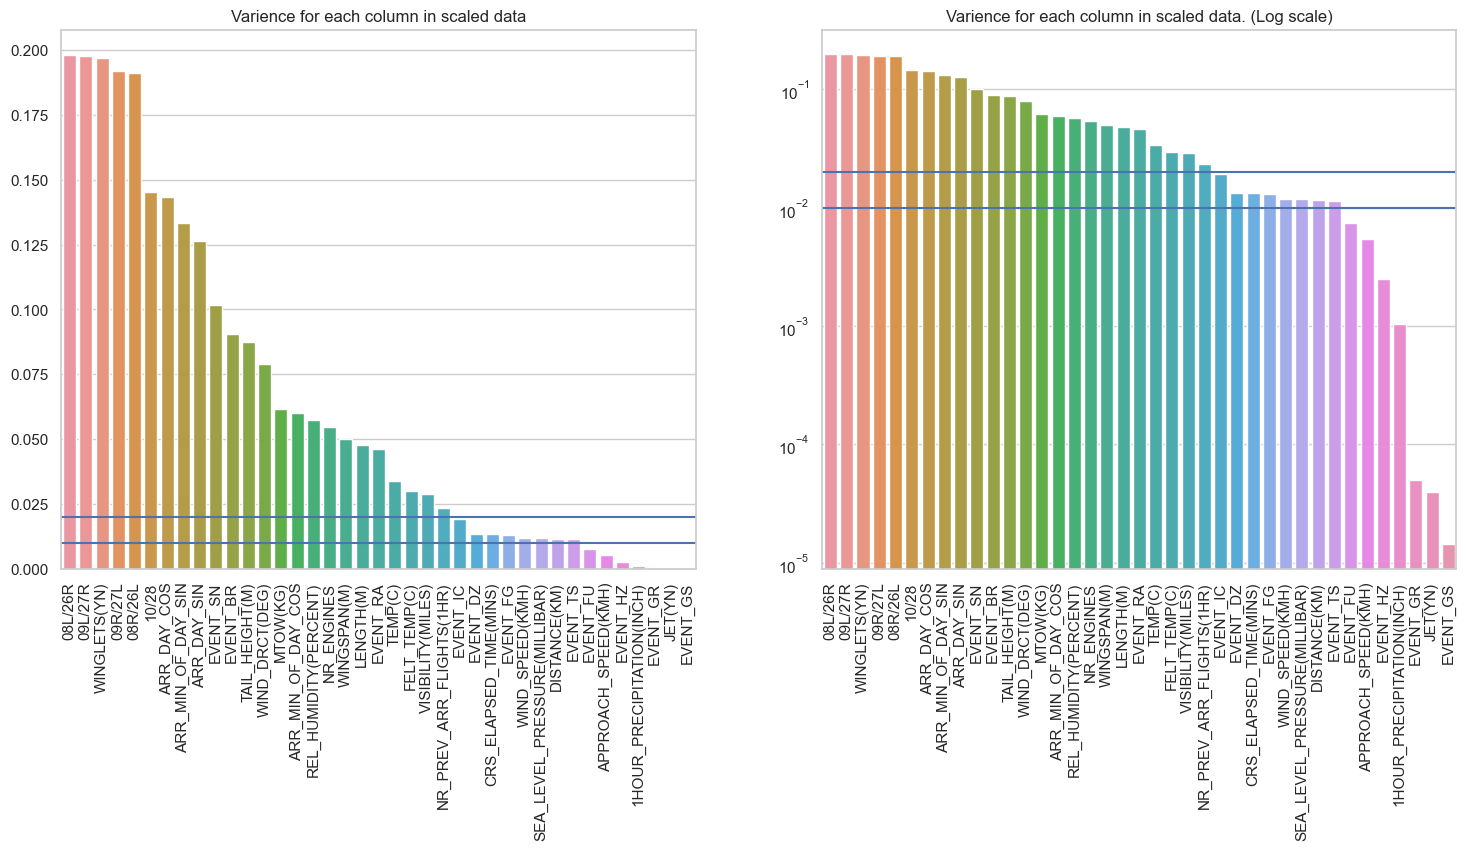

In [100]:
fig, axes = plt.subplots(1,2,figsize=(18,7))
var = pd.DataFrame(X_train_minmax, columns=X_train.columns).var().sort_values(ascending=False)
sns.set(style="whitegrid")
sns.barplot(x=list(var.index), y = list(var.values), ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, horizontalalignment='center')
axes[0].set_title("Varience for each column in scaled data")
sns.barplot(x=list(var.index), y = list(var.values), ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, horizontalalignment='center')
axes[1].set_yscale("log")
axes[1].set_title("Varience for each column in scaled data. (Log scale)")
axes[0].axhline(0.01)
axes[1].axhline(0.01)
axes[0].axhline(0.02)
axes[1].axhline(0.02)

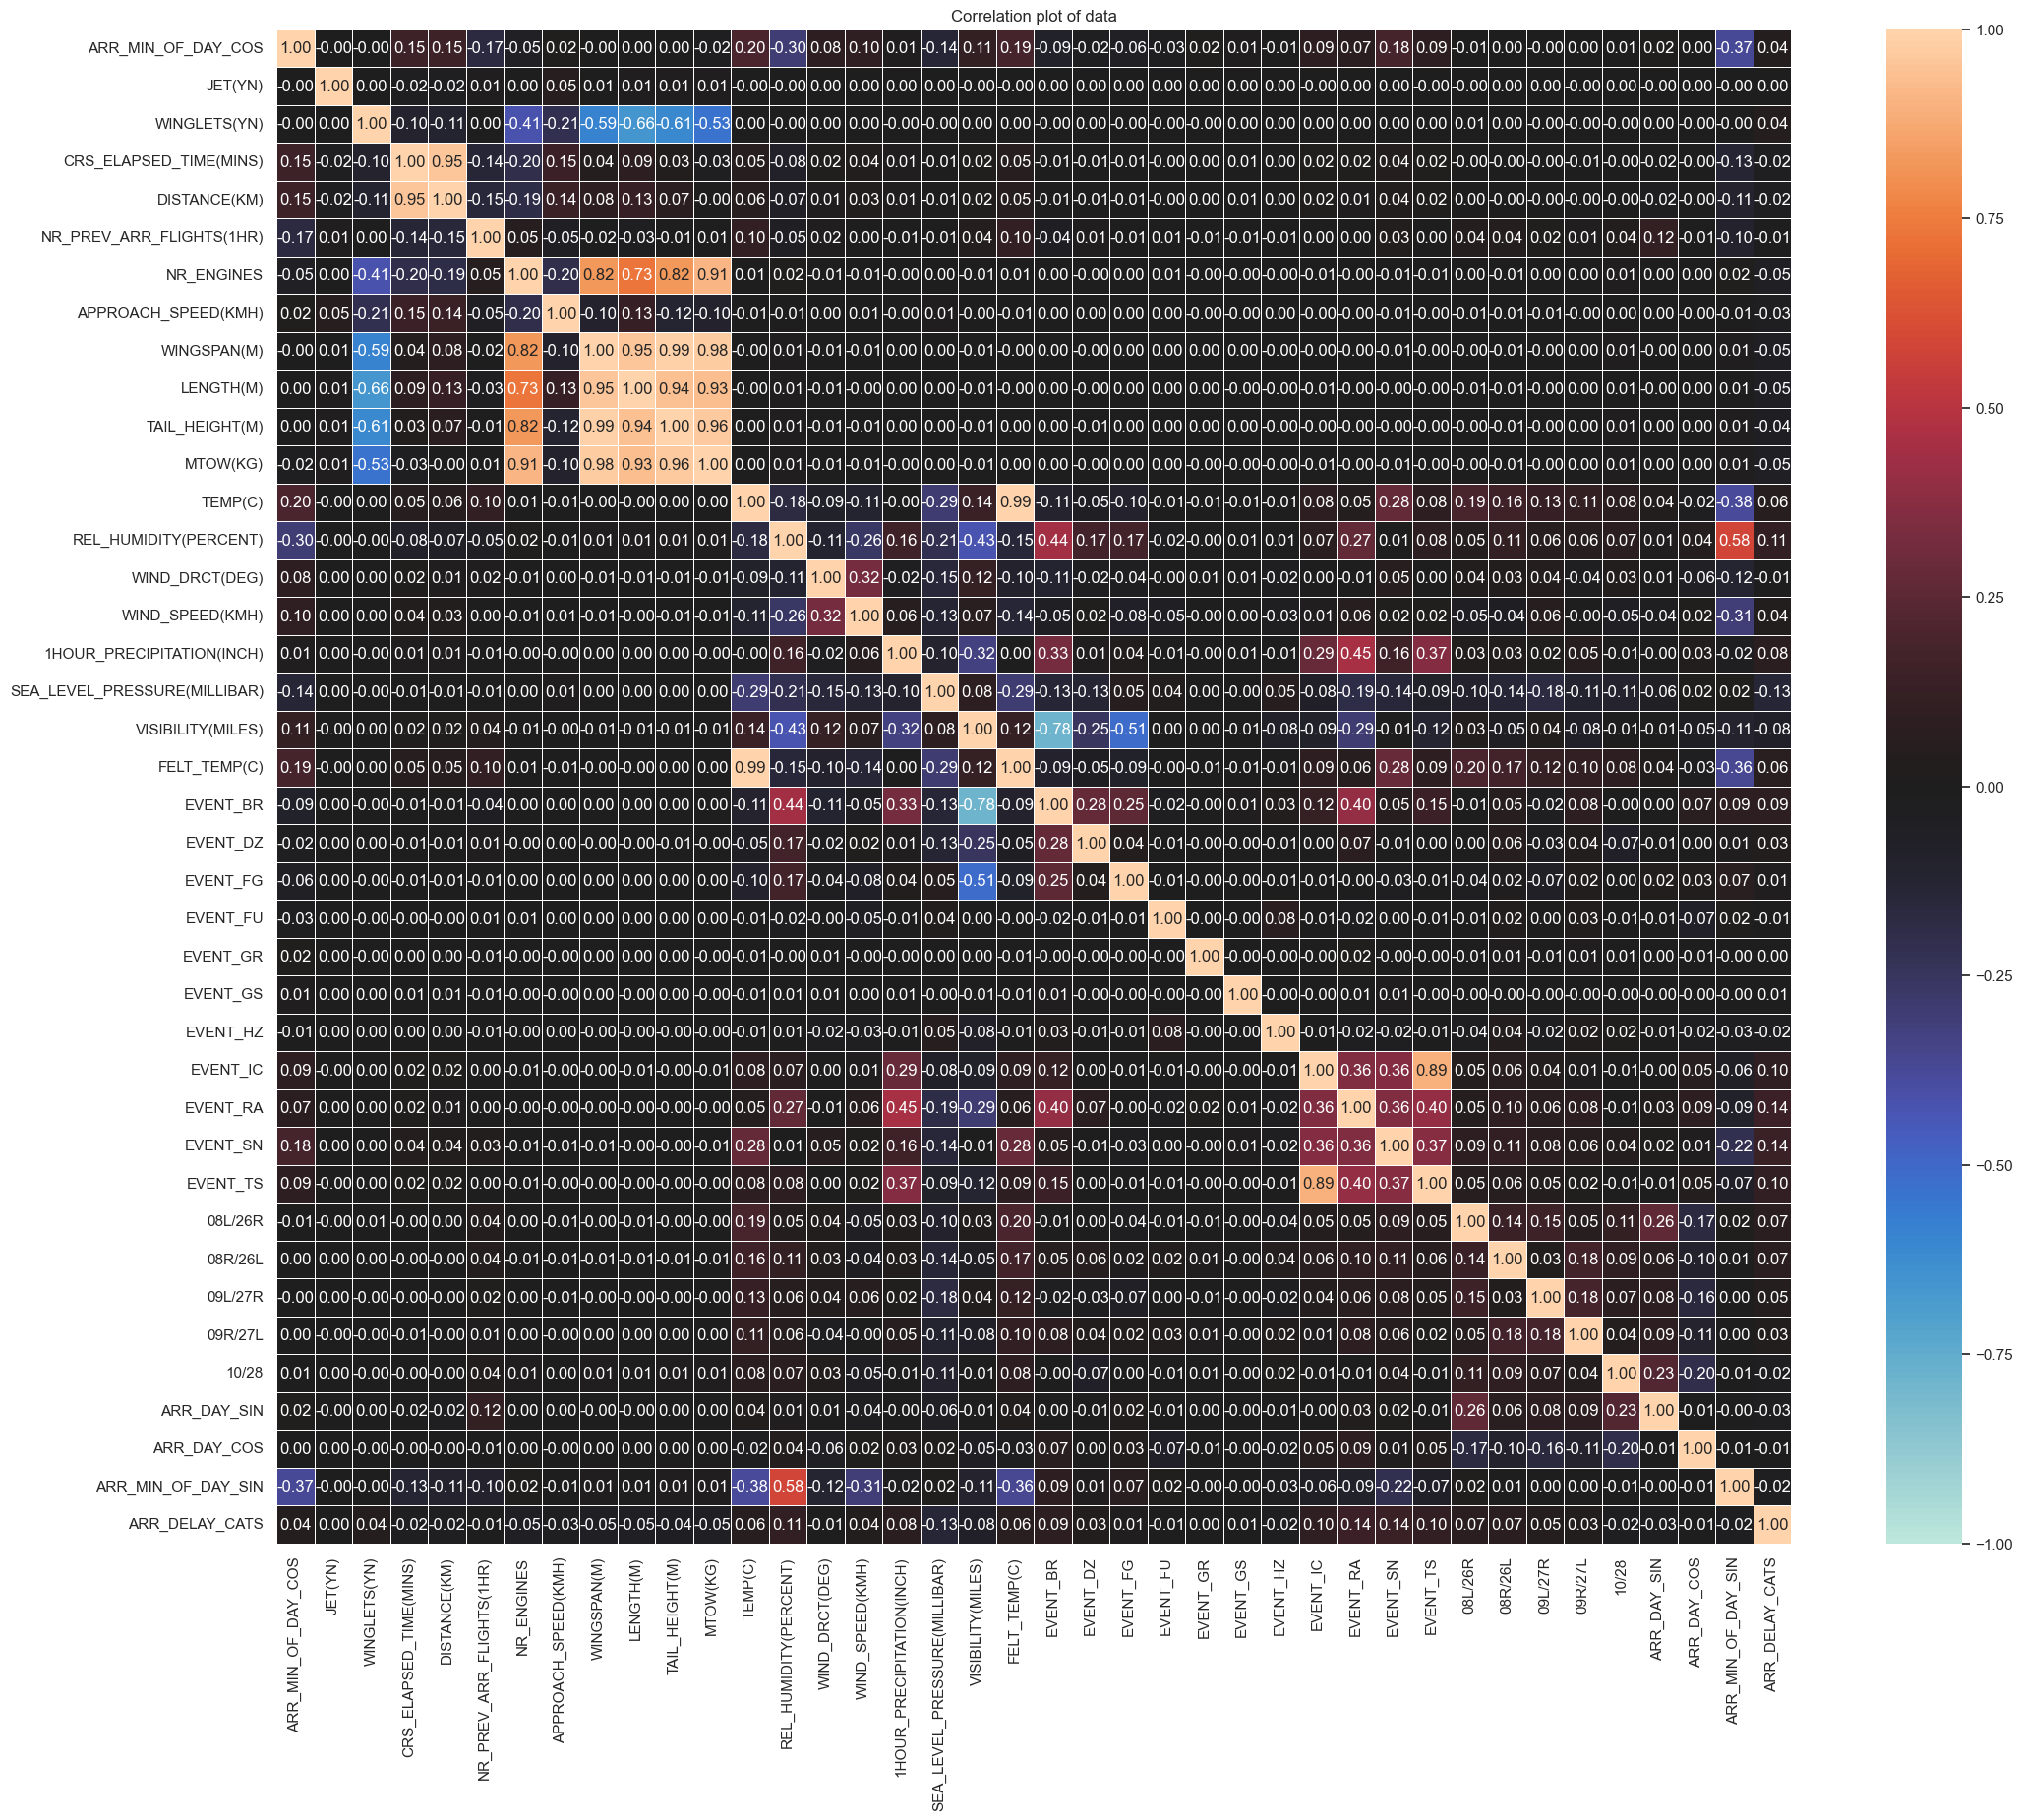

In [101]:
fig, ax = plt.subplots(figsize=(25,20))
ax.set_title("Correlation plot of data")
g = sns.heatmap(pd.DataFrame(np.hstack((X_train_minmax,y_train)), columns=list(X_train.columns) + list(y_train.columns)).corr(), center = 0, square=True, linewidths=.5, cbar=True, vmin=-1, vmax=1, annot=True, ax = ax, fmt=".2f")

In [102]:
low_var_labels = list(var[var < 0.01].index)
high_corr_labels = ["DISTANCE(KM)","NR_ENGINES","WINGSPAN(M)","LENGTH(M)","TAIL_HEIGHT(M)","FELT_TEMP(C)"]
labels_to_drop = low_var_labels + high_corr_labels
labels_to_drop

['EVENT_FU',
 'APPROACH_SPEED(KMH)',
 'EVENT_HZ',
 '1HOUR_PRECIPITATION(INCH)',
 'EVENT_GR',
 'JET(YN)',
 'EVENT_GS',
 'DISTANCE(KM)',
 'NR_ENGINES',
 'WINGSPAN(M)',
 'LENGTH(M)',
 'TAIL_HEIGHT(M)',
 'FELT_TEMP(C)']

In [103]:
X_train = X_train.drop(columns=labels_to_drop, axis="columns")
X_test = X_test.drop(columns=labels_to_drop, axis="columns")
X_train

,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
7876359,-0.176292,0,74.0,8,206384.360000,21.111111,83.86,270.0,16.668,1014.5,...,0,0,0.0,0.0,3.0,3.0,2.0,0.000000,1.000000,0.984338
8281253,0.417745,1,102.0,72,93499.826144,26.555556,85.62,155.0,12.964,1015.7,...,2,2,3.0,1.0,1.0,1.0,3.0,0.433884,-0.900969,-0.908564
11259811,0.227567,0,117.0,68,53523.856000,10.611111,40.63,250.0,5.556,1023.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969,-0.973763
6592688,-0.554733,0,139.0,57,53523.856000,18.888889,17.78,350.0,24.076,1026.8,...,0,0,1.0,3.0,1.0,3.0,3.0,0.974928,-0.222521,-0.832029
8970026,0.503484,0,186.0,72,53523.856000,27.777778,58.43,200.0,7.408,1017.9,...,0,0,3.0,0.0,0.0,3.0,2.0,0.433884,-0.900969,-0.864005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577632,-0.305184,1,107.0,47,76499.651576,17.777778,74.93,290.0,11.112,1016.3,...,0,0,0.0,0.0,0.0,3.0,3.0,0.974928,-0.222521,0.952293
6856848,-0.908564,0,298.0,48,206384.360000,13.277778,86.71,110.0,7.408,1025.3,...,0,0,3.0,3.0,0.0,0.0,2.0,-0.974928,-0.222521,0.417745
10388189,-0.861970,0,108.0,54,206384.360000,9.388889,92.77,0.0,0.000,1020.4,...,0,0,0.0,3.0,0.0,0.0,3.0,0.974928,-0.222521,0.506960
9936124,-0.537866,0,171.0,62,206384.360000,16.722222,86.11,80.0,12.964,1027.9,...,0,0,3.0,3.0,3.0,0.0,0.0,0.781831,0.623490,0.843031


In [104]:
tomek = TomekLinks(sampling_strategy='majority')
X_train, y_train = tomek.fit_resample(X_train, y_train)
X_train

,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
0,0.417745,1,102.0,72,93499.826144,26.555556,85.62,155.0,12.964,1015.7,...,2,2,3.0,1.0,1.0,1.0,3.0,0.433884,-0.900969,-0.908564
1,0.227567,0,117.0,68,53523.856000,10.611111,40.63,250.0,5.556,1023.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969,-0.973763
2,-0.554733,0,139.0,57,53523.856000,18.888889,17.78,350.0,24.076,1026.8,...,0,0,1.0,3.0,1.0,3.0,3.0,0.974928,-0.222521,-0.832029
3,0.503484,0,186.0,72,53523.856000,27.777778,58.43,200.0,7.408,1017.9,...,0,0,3.0,0.0,0.0,3.0,2.0,0.433884,-0.900969,-0.864005
4,-0.520780,1,184.0,66,78000.133912,4.388889,26.40,140.0,12.964,1037.8,...,0,0,0.0,0.0,0.0,0.0,3.0,0.000000,1.000000,-0.853691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245614,-0.953515,0,156.0,45,206384.360000,0.611111,66.06,310.0,12.964,1026.5,...,0,0,0.0,0.0,0.0,0.0,2.0,-0.781831,0.623490,-0.301346
245615,0.203970,0,86.0,74,206384.360000,27.777778,29.28,145.0,11.112,1015.8,...,0,0,0.0,3.0,3.0,0.0,0.0,-0.781831,0.623490,-0.978977
245616,-0.861970,0,108.0,54,206384.360000,9.388889,92.77,0.0,0.000,1020.4,...,0,0,0.0,3.0,0.0,0.0,3.0,0.974928,-0.222521,0.506960
245617,-0.537866,0,171.0,62,206384.360000,16.722222,86.11,80.0,12.964,1027.9,...,0,0,3.0,3.0,3.0,0.0,0.0,0.781831,0.623490,0.843031


In [105]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_scaled

array([[ 1.76184272,  1.6460645 , -0.60253965, ...,  0.57092232,
        -1.2533339 , -1.01961045],
       [ 1.3736776 , -0.60750961, -0.4481368 , ..., -0.67976174,
        -1.2533339 , -1.10874482],
       [-0.22303921, -0.60750961, -0.22167928, ...,  1.35071108,
        -0.30992356, -0.91497641],
       ...,
       [-0.85012708, -0.60750961, -0.54077851, ...,  1.35071108,
        -0.30992356,  0.91559207],
       [-0.18861253, -0.60750961,  0.10771347, ...,  1.07240769,
         0.86648988,  1.37504374],
       [-0.99628866, -0.60750961, -0.94222592, ..., -0.67976174,
        -1.2533339 ,  0.71244793]])

In [106]:
X_train

,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
0,0.417745,1,102.0,72,93499.826144,26.555556,85.62,155.0,12.964,1015.7,...,2,2,3.0,1.0,1.0,1.0,3.0,0.433884,-0.900969,-0.908564
1,0.227567,0,117.0,68,53523.856000,10.611111,40.63,250.0,5.556,1023.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.433884,-0.900969,-0.973763
2,-0.554733,0,139.0,57,53523.856000,18.888889,17.78,350.0,24.076,1026.8,...,0,0,1.0,3.0,1.0,3.0,3.0,0.974928,-0.222521,-0.832029
3,0.503484,0,186.0,72,53523.856000,27.777778,58.43,200.0,7.408,1017.9,...,0,0,3.0,0.0,0.0,3.0,2.0,0.433884,-0.900969,-0.864005
4,-0.520780,1,184.0,66,78000.133912,4.388889,26.40,140.0,12.964,1037.8,...,0,0,0.0,0.0,0.0,0.0,3.0,0.000000,1.000000,-0.853691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245614,-0.953515,0,156.0,45,206384.360000,0.611111,66.06,310.0,12.964,1026.5,...,0,0,0.0,0.0,0.0,0.0,2.0,-0.781831,0.623490,-0.301346
245615,0.203970,0,86.0,74,206384.360000,27.777778,29.28,145.0,11.112,1015.8,...,0,0,0.0,3.0,3.0,0.0,0.0,-0.781831,0.623490,-0.978977
245616,-0.861970,0,108.0,54,206384.360000,9.388889,92.77,0.0,0.000,1020.4,...,0,0,0.0,3.0,0.0,0.0,3.0,0.974928,-0.222521,0.506960
245617,-0.537866,0,171.0,62,206384.360000,16.722222,86.11,80.0,12.964,1027.9,...,0,0,3.0,3.0,3.0,0.0,0.0,0.781831,0.623490,0.843031


In [107]:
filepath = "./processed_files/NEW/"

pd.to_pickle(X_train, filepath + "X_train_df.pkl")
pd.to_pickle(X_test, filepath + "X_test_df.pkl")
pd.to_pickle(y_train, filepath + "y_train_df.pkl")
pd.to_pickle(y_test, filepath + "y_test_df.pkl")
data_manage_utils.save_numpy_to_pickle(X_train_scaled, filepath + "X_train_scaled.pkl")
data_manage_utils.save_numpy_to_pickle(y_train.to_numpy(), filepath + "y_train.pkl")
data_manage_utils.save_numpy_to_pickle(X_test_scaled, filepath + "X_test_scaled.pkl")
data_manage_utils.save_numpy_to_pickle(y_test.to_numpy(), filepath + "y_test.pkl")
joblib.dump(std_scaler, filepath + "scaler.sav")

['./processed_files/NEW/scaler.sav']